In [328]:
# Import our dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [329]:
# Import our input dataset
weather_df_original = pd.read_csv('https://raw.githubusercontent.com/Alphaomegainfinity/energy_consumption_vs_weather_data/main/Resources/weather.csv', encoding='latin-1')
price_demand_df_original = pd.read_csv('https://raw.githubusercontent.com/Alphaomegainfinity/energy_consumption_vs_weather_data/main/Resources/price_and_demand.csv', encoding='latin-1')

In [330]:
# Checking any missing values per column and per rows
def data_checking(weather):
    # Identify NaN or empty values
    missing_values = weather.isna().sum()

    # Identify incorrect value types
    incorrect_types = weather.apply(lambda x: pd.to_numeric(x, errors='coerce').isna().sum())

    # Combine the results into a DataFrame
    cleaning_report = pd.DataFrame({'Missing Values': missing_values, 'Incorrect Types': incorrect_types})

    return cleaning_report

### Processing Weather file

In [331]:
data_checking (weather_df_original)

,Missing Values,Incorrect Types
Location,0,175
Date,0,175
Minimum temperature (°C),0,0
Maximum temperature (°C),1,1
Rainfall (mm),0,0
Evaporation (mm),175,175
Sunshine (hours),175,175
Direction of maximum wind gust,1,175
Speed of maximum wind gust (km/h),1,1
Time of maximum wind gust,1,175


In [332]:
# Create a copy of the original dataframe to avoid modifying it
weather_df = weather_df_original.copy()
price_demand_df = price_demand_df_original.copy()

In [333]:
# Drop off all empty columns
weather_df = weather_df.dropna(axis=1, how='all')
weather_df

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,SW,44.0,11:36:00,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33:00,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07:00,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,S,24.0,14:50:00,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,N,31.0,11:58:00,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47:00,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48:00,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,SSW,22.0,16:09:00,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,SSW,26.0,15:45:00,16.7,79,SSE,7,1034.4,17.8,71.0,SSW,13.0,1032.4


In [334]:
# Convert the Date column to datetime64
weather_df['Date'] = pd.to_datetime(weather_df['Date'], dayfirst=True)

In [335]:
# check the data types
weather_df.dtypes

Location                                     object
Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Direction of maximum wind gust               object
Speed of maximum wind gust (km/h)           float64
Time of maximum wind gust                    object
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind direction                           object
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind direction                           object
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object

In [336]:
# Drop off all rows that have more than 4 missing values
weather_df = weather_df.dropna(thresh=len(weather_df.columns)-4)

In [337]:
# Set the Time of maximum wind gust column to numeric:
weather_df['Time of maximum wind gust'] = pd.to_timedelta(weather_df['Time of maximum wind gust'].apply(lambda x: x.zfill(5)))

/var/folders/1q/m_w3rzf53dsffnjskzdfh89m0000gn/T/ipykernel_30955/1344425496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Time of maximum wind gust'] = pd.to_timedelta(weather_df['Time of maximum wind gust'].apply(lambda x: x.zfill(5)))


In [338]:
# Replace 'calm' with 0
weather_df['9am wind speed (km/h)'] = weather_df['9am wind speed (km/h)'].replace('Calm', 0.0, inplace=False)

# Convert the 9am wind speed column to numeric:
weather_df['9am wind speed (km/h)'] = pd.to_numeric(weather_df['9am wind speed (km/h)'])

/var/folders/1q/m_w3rzf53dsffnjskzdfh89m0000gn/T/ipykernel_30955/1016144277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['9am wind speed (km/h)'] = weather_df['9am wind speed (km/h)'].replace('Calm', 0.0, inplace=False)
/var/folders/1q/m_w3rzf53dsffnjskzdfh89m0000gn/T/ipykernel_30955/1016144277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['9am wind speed (km/h)'] = pd.to_numeric(weather_df['9am wind speed (km/h)'])


In [339]:
weather_df

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",2022-11-01,8.5,13.3,3.0,SW,44.0,0 days 11:36:00,12.0,64,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2022-11-02,6.9,15.7,2.8,SSW,43.0,0 days 11:33:00,11.0,65,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",2022-11-03,9.1,15.4,0.4,SSW,31.0,0 days 08:07:00,11.5,70,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",2022-11-04,10.2,17.8,0.2,S,24.0,0 days 14:50:00,12.3,84,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",2022-11-05,11.8,22.7,0.0,N,31.0,0 days 11:58:00,14.0,78,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,"Melbourne (Olympic Park), Victoria",2023-04-19,14.4,17.5,1.2,SW,28.0,0 days 11:32:00,14.8,66,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1
170,"Melbourne (Olympic Park), Victoria",2023-04-20,7.8,18.5,0.0,SSW,17.0,0 days 12:47:00,12.4,72,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",2023-04-21,11.3,19.0,0.0,SSW,13.0,0 days 10:48:00,14.8,78,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",2023-04-22,14.6,19.2,0.0,SSW,22.0,0 days 16:09:00,15.2,84,SW,6.0,1031.9,18.8,64.0,SSW,11.0,1029.7


In [340]:
data_checking (weather_df)

,Missing Values,Incorrect Types
Location,0,174
Date,0,0
Minimum temperature (°C),0,0
Maximum temperature (°C),0,0
Rainfall (mm),0,0
Direction of maximum wind gust,0,174
Speed of maximum wind gust (km/h),0,0
Time of maximum wind gust,0,0
9am Temperature (°C),0,0
9am relative humidity (%),0,0


### Processing Price and Demand file

In [341]:
data_checking (price_demand_df)

,Missing Values,Incorrect Types
VIC1,0,8351
1/11/2022 0:30,0,8351
4178.18,0,0
8.94,0,0
TRADE,0,8351


In [342]:
# Checking data type and shape of dataframe
price_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8351 entries, 0 to 8350
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VIC1            8351 non-null   object 
 1   1/11/2022 0:30  8351 non-null   object 
 2   4178.18         8351 non-null   float64
 3   8.94            8351 non-null   float64
 4   TRADE           8351 non-null   object 
dtypes: float64(2), object(3)
memory usage: 326.3+ KB


In [343]:
# Adding headers for price_demand_df:
header = ["State", "Date_Time", "Demand", "Price", "Trading_Status"]
price_demand_df.columns = header
price_demand_df

,State,Date_Time,Demand,Price,Trading_Status
0,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
1,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
2,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
3,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE
4,VIC1,1/11/2022 3:00,3919.59,1.04,TRADE
...,...,...,...,...,...
8346,VIC1,23/04/2023 22:00,4717.55,84.09,TRADE
8347,VIC1,23/04/2023 22:30,4520.39,81.25,TRADE
8348,VIC1,23/04/2023 23:00,4472.49,93.97,TRADE
8349,VIC1,23/04/2023 23:30,4621.36,83.96,TRADE


In [344]:
# Convert the Date_Time column from object type to datetime type,
price_demand_df['Date_Time'] = pd.to_datetime(price_demand_df['Date_Time'], dayfirst=True)

In [345]:
# Drop off any irrelevant columns
price_demand_df = price_demand_df[['Date_Time', 'Demand', 'Price']]
price_demand_df

,Date_Time,Demand,Price
0,2022-11-01 01:00:00,4086.02,0.14
1,2022-11-01 01:30:00,4033.37,0.02
2,2022-11-01 02:00:00,3985.64,0.00
3,2022-11-01 02:30:00,3885.64,0.02
4,2022-11-01 03:00:00,3919.59,1.04
...,...,...,...
8346,2023-04-23 22:00:00,4717.55,84.09
8347,2023-04-23 22:30:00,4520.39,81.25
8348,2023-04-23 23:00:00,4472.49,93.97
8349,2023-04-23 23:30:00,4621.36,83.96


In [346]:
# rechecking the dataframe information and type
price_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8351 entries, 0 to 8350
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date_Time  8351 non-null   datetime64[ns]
 1   Demand     8351 non-null   float64       
 2   Price      8351 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 195.9 KB


In [347]:
# Split the Date_Time column into separate Date and Time columns
price_demand_df['Date'] = pd.to_datetime(((price_demand_df['Date_Time']).dt.date), dayfirst=True)
price_demand_df['Time'] = pd.to_datetime(price_demand_df['Date_Time'].dt.strftime('%H:%M:%S')).dt.time

# Rearrange all the columns, remove the Time column because it is redundant
price_demand = price_demand_df[['Date', 'Demand', 'Price']]
price_demand

/var/folders/1q/m_w3rzf53dsffnjskzdfh89m0000gn/T/ipykernel_30955/2933327254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_demand_df['Date'] = pd.to_datetime(((price_demand_df['Date_Time']).dt.date), dayfirst=True)


,Date,Demand,Price
0,2022-11-01,4086.02,0.14
1,2022-11-01,4033.37,0.02
2,2022-11-01,3985.64,0.00
3,2022-11-01,3885.64,0.02
4,2022-11-01,3919.59,1.04
...,...,...,...
8346,2023-04-23,4717.55,84.09
8347,2023-04-23,4520.39,81.25
8348,2023-04-23,4472.49,93.97
8349,2023-04-23,4621.36,83.96


In [348]:
price_demand = price_demand.groupby(['Date']).sum().reset_index()
price_demand

#the totatal demand

,Date,Demand,Price
0,2022-11-01,203251.28,-185.78
1,2022-11-02,233630.93,-120.73
2,2022-11-03,235672.34,3034.04
3,2022-11-04,224895.28,5325.08
4,2022-11-05,189190.35,3502.20
...,...,...,...
170,2023-04-20,227925.10,6273.96
171,2023-04-21,232043.13,6310.13
172,2023-04-22,207431.82,3858.79
173,2023-04-23,195560.35,3034.26


In [349]:
# Joining two datasets: energy consumption and weather
daily_weather_energy_consumption_df = pd.merge(weather_df, price_demand, on='Date', how='inner')
daily_weather_energy_consumption_df

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Demand,Price
0,"Melbourne (Olympic Park), Victoria",2022-11-01,8.5,13.3,3.0,SW,44.0,0 days 11:36:00,12.0,64,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5,203251.28,-185.78
1,"Melbourne (Olympic Park), Victoria",2022-11-02,6.9,15.7,2.8,SSW,43.0,0 days 11:33:00,11.0,65,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4,233630.93,-120.73
2,"Melbourne (Olympic Park), Victoria",2022-11-03,9.1,15.4,0.4,SSW,31.0,0 days 08:07:00,11.5,70,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3,235672.34,3034.04
3,"Melbourne (Olympic Park), Victoria",2022-11-04,10.2,17.8,0.2,S,24.0,0 days 14:50:00,12.3,84,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6,224895.28,5325.08
4,"Melbourne (Olympic Park), Victoria",2022-11-05,11.8,22.7,0.0,N,31.0,0 days 11:58:00,14.0,78,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2,189190.35,3502.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,"Melbourne (Olympic Park), Victoria",2023-04-19,14.4,17.5,1.2,SW,28.0,0 days 11:32:00,14.8,66,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1,220897.61,4912.03
170,"Melbourne (Olympic Park), Victoria",2023-04-20,7.8,18.5,0.0,SSW,17.0,0 days 12:47:00,12.4,72,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5,227925.10,6273.96
171,"Melbourne (Olympic Park), Victoria",2023-04-21,11.3,19.0,0.0,SSW,13.0,0 days 10:48:00,14.8,78,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2,232043.13,6310.13
172,"Melbourne (Olympic Park), Victoria",2023-04-22,14.6,19.2,0.0,SSW,22.0,0 days 16:09:00,15.2,84,SW,6.0,1031.9,18.8,64.0,SSW,11.0,1029.7,207431.82,3858.79


In [350]:
# Drop off the location of the dataset as all the recorded data is at the same location
daily_weather_energy_consumption_df = daily_weather_energy_consumption_df.drop(['Location'], axis=1)

#Drop off Price as that is not independent, it's dependent on Demand -HK
daily_weather_energy_consumption_df = daily_weather_energy_consumption_df.drop(['Price'], axis=1)

In [351]:
daily_weather_energy_consumption_df.dtypes

Date                                  datetime64[ns]
Minimum temperature (°C)                     float64
Maximum temperature (°C)                     float64
Rainfall (mm)                                float64
Direction of maximum wind gust                object
Speed of maximum wind gust (km/h)            float64
Time of maximum wind gust            timedelta64[ns]
9am Temperature (°C)                         float64
9am relative humidity (%)                      int64
9am wind direction                            object
9am wind speed (km/h)                        float64
9am MSL pressure (hPa)                       float64
3pm Temperature (°C)                         float64
3pm relative humidity (%)                    float64
3pm wind direction                            object
3pm wind speed (km/h)                        float64
3pm MSL pressure (hPa)                       float64
Demand                                       float64
dtype: object

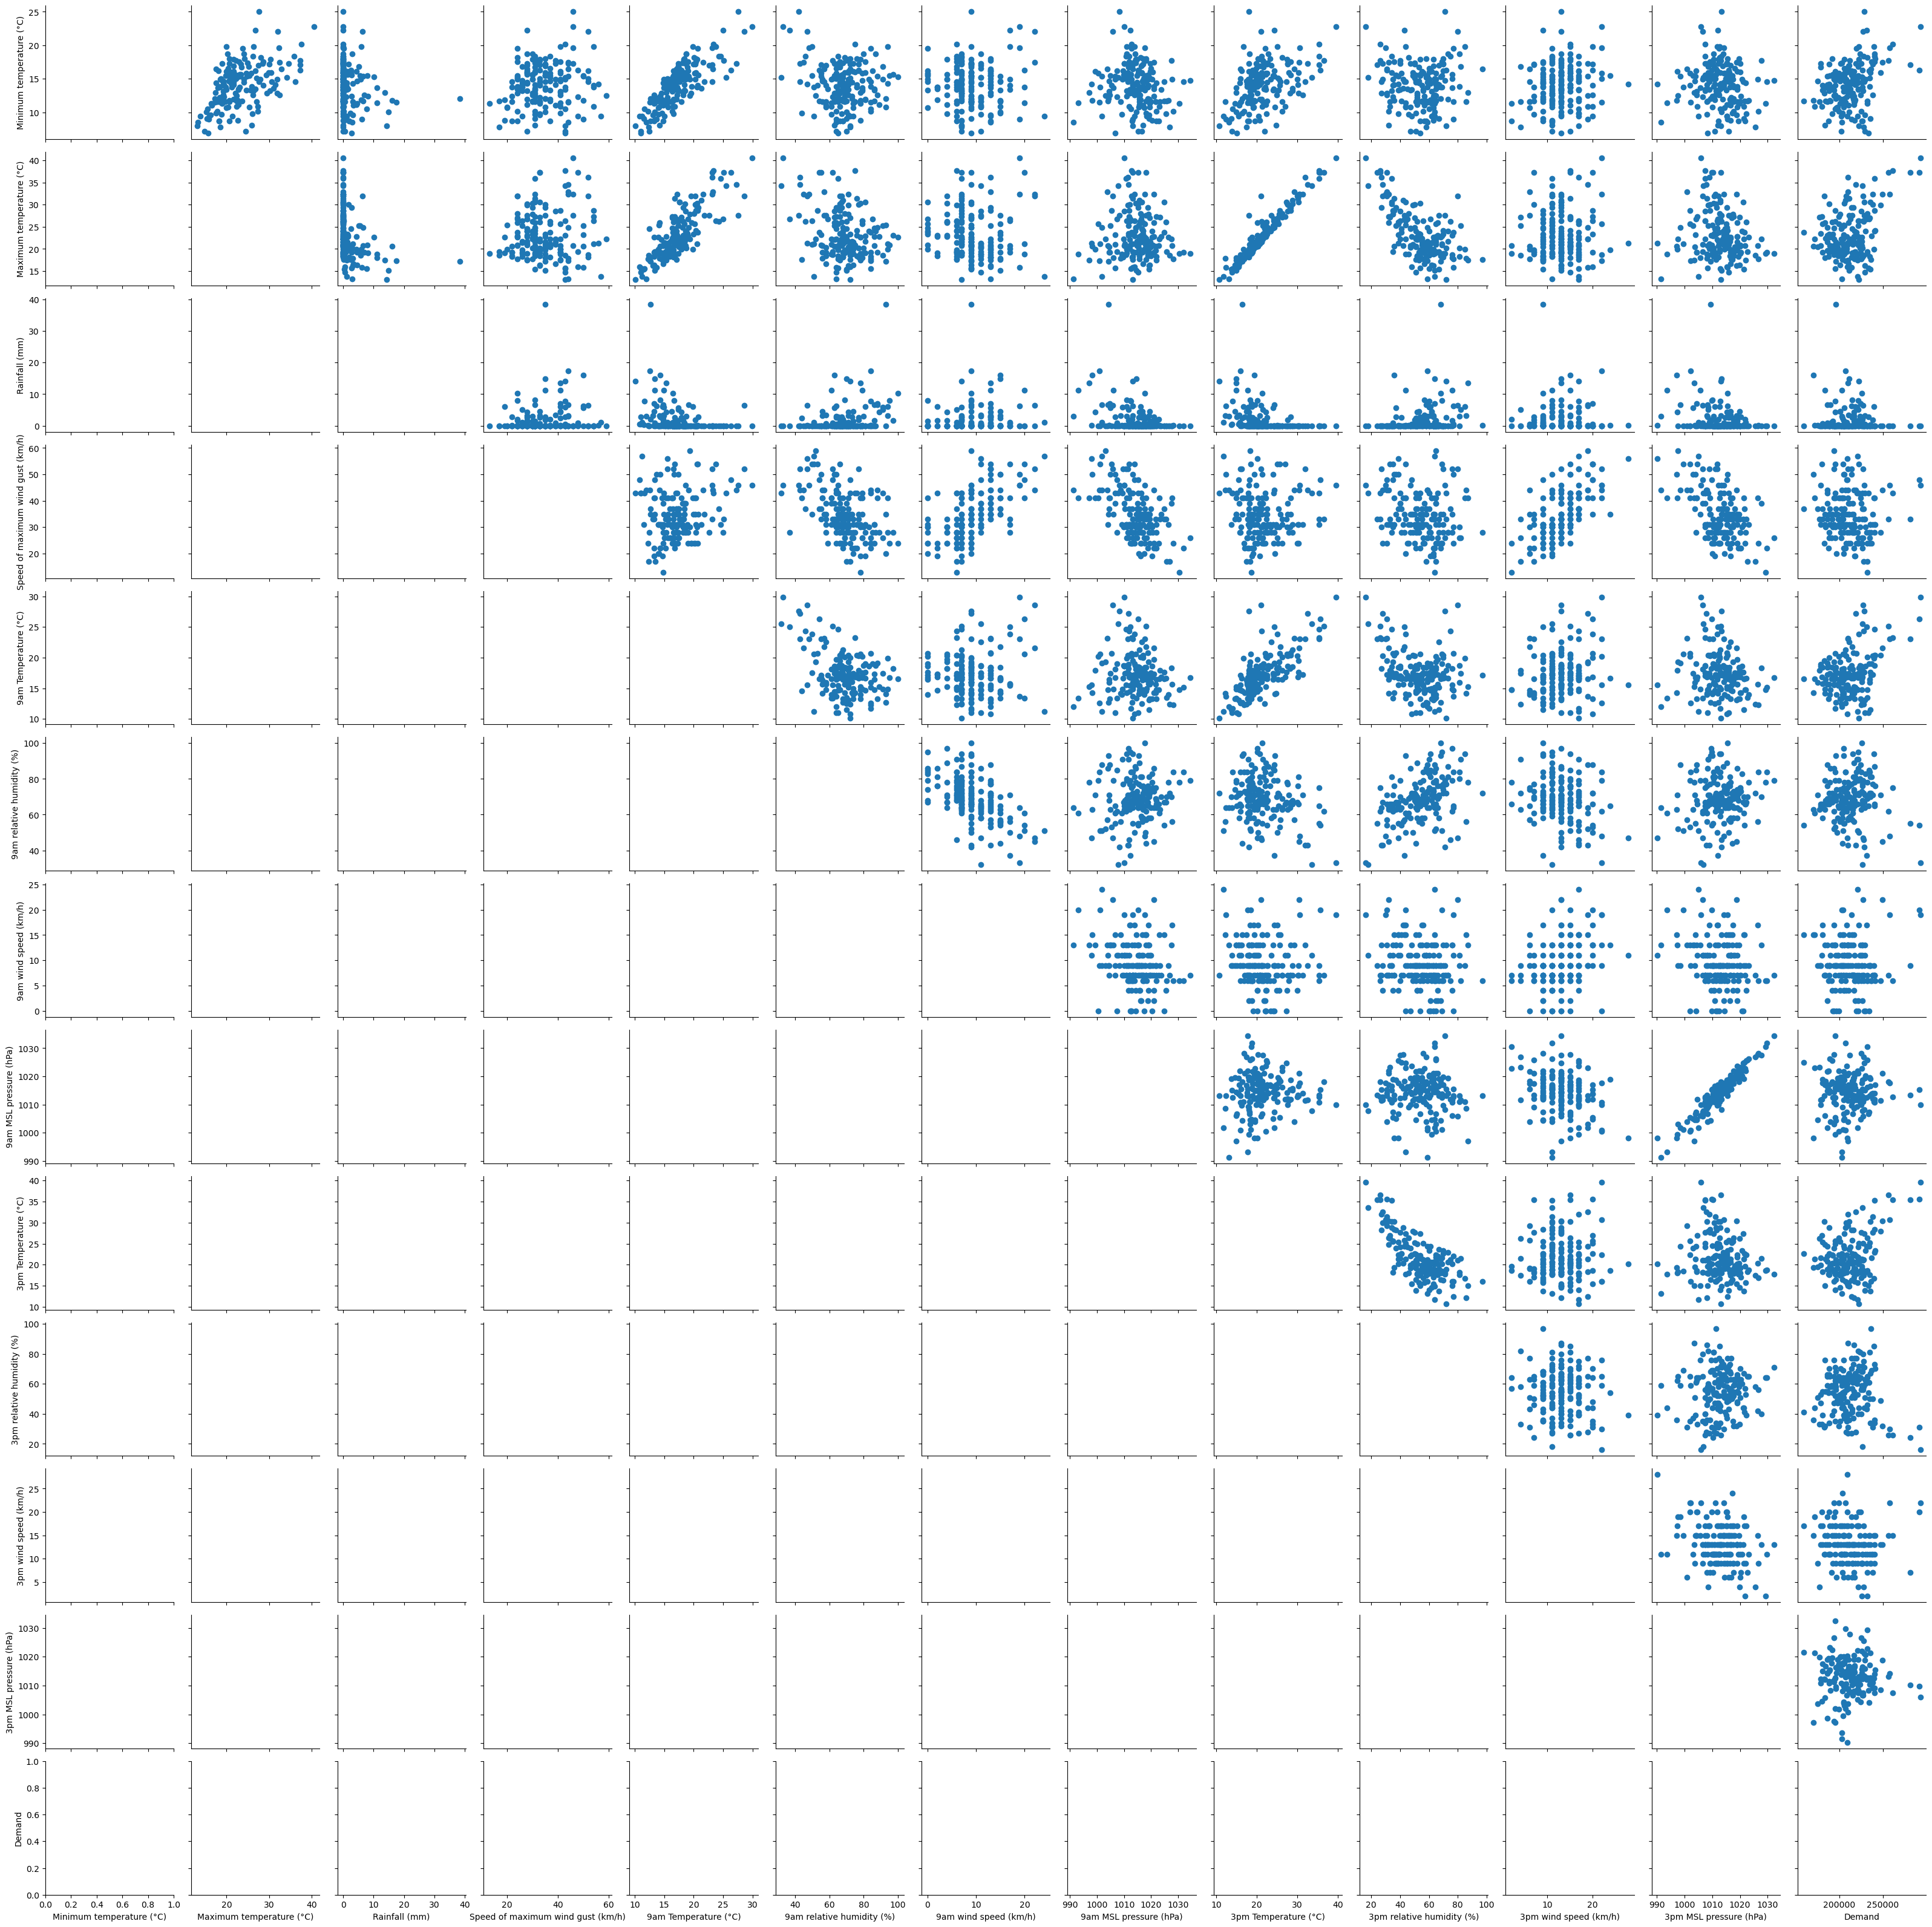

In [352]:
# Correlation Matrix to make all scatter plots at once
# Create a grid of column pairs with scatter plots for non-diagonal(upper portion)
sns.PairGrid(daily_weather_energy_consumption_df).map_upper(plt.scatter)

#is there a way to do this with demand as the only y? otherwise is it too much? -HK

In [353]:
daily_weather_energy_consumption_df = pd.get_dummies(daily_weather_energy_consumption_df)
daily_weather_energy_consumption_df.head()

#what is happening to the wind data columns here? What is the purpose of this code? -HK
#doing something  strange with the wind directions 

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),...,3pm wind direction_NNW,3pm wind direction_NW,3pm wind direction_S,3pm wind direction_SE,3pm wind direction_SSE,3pm wind direction_SSW,3pm wind direction_SW,3pm wind direction_W,3pm wind direction_WNW,3pm wind direction_WSW
0,2022-11-01,8.5,13.3,3.0,44.0,0 days 11:36:00,12.0,64,13.0,991.3,...,0,0,0,0,0,0,0,0,1,0
1,2022-11-02,6.9,15.7,2.8,43.0,0 days 11:33:00,11.0,65,9.0,1006.7,...,0,0,0,0,0,1,0,0,0,0
2,2022-11-03,9.1,15.4,0.4,31.0,0 days 08:07:00,11.5,70,9.0,1019.2,...,0,0,0,0,0,1,0,0,0,0
3,2022-11-04,10.2,17.8,0.2,24.0,0 days 14:50:00,12.3,84,6.0,1028.1,...,0,0,0,0,0,0,1,0,0,0
4,2022-11-05,11.8,22.7,0.0,31.0,0 days 11:58:00,14.0,78,9.0,1026.3,...,0,0,0,0,0,0,1,0,0,0


In [354]:
# Checkin the data types of the columns
daily_weather_energy_consumption_df.dtypes

Date                                    datetime64[ns]
Minimum temperature (°C)                       float64
Maximum temperature (°C)                       float64
Rainfall (mm)                                  float64
Speed of maximum wind gust (km/h)              float64
Time of maximum wind gust              timedelta64[ns]
9am Temperature (°C)                           float64
9am relative humidity (%)                        int64
9am wind speed (km/h)                          float64
9am MSL pressure (hPa)                         float64
3pm Temperature (°C)                           float64
3pm relative humidity (%)                      float64
3pm wind speed (km/h)                          float64
3pm MSL pressure (hPa)                         float64
Demand                                         float64
Direction of maximum wind gust _E                uint8
Direction of maximum wind gust _ESE              uint8
Direction of maximum wind gust _N                uint8
Direction 

In [355]:
# Drop any rows with missing values (if needed)
daily_weather_energy_consumption_df = daily_weather_energy_consumption_df.dropna()

In [356]:
# Split our preprocessed data into our features and target arrays

y = daily_weather_energy_consumption_df["Demand"]
X = daily_weather_energy_consumption_df.drop(["Demand", "Date", "Time of maximum wind gust"], axis=1)

### *Which Model will be used*
We use Regresssion Model because our target value is maximum daily energy usage and it is a continuous (numerical) value

[1.43612441e-01 1.53168173e-01 1.97922318e-02 4.62700323e-02
 8.35272554e-02 6.51732380e-02 2.56805239e-02 3.89415465e-02
 1.88931822e-01 5.42372388e-02 3.14069286e-02 3.50217893e-02
 3.47176573e-05 2.80928703e-03 5.45060801e-03 8.40354462e-04
 3.23114303e-03 9.30693371e-04 5.85532391e-03 4.15981676e-05
 5.22067010e-03 6.13348747e-03 2.53281249e-03 3.87777868e-04
 2.06893805e-04 2.82212603e-04 2.05285351e-03 3.89664754e-05
 1.08035562e-03 2.57576295e-04 4.32057600e-03 3.84041377e-03
 3.24298713e-03 5.85610514e-04 1.23936585e-03 1.18175660e-03
 3.39438867e-03 2.94702694e-03 1.47048801e-03 9.38574601e-03
 2.28748679e-03 5.65220093e-04 1.29495729e-03 6.34482069e-05
 2.87906845e-03 3.53348734e-09 7.01202292e-04 8.50358347e-04
 1.40552087e-03 4.79293714e-03 1.99302984e-02 4.08270629e-04
 5.61813755e-03 1.48247428e-03 2.89725457e-05 1.25120323e-03
 1.68152795e-03]


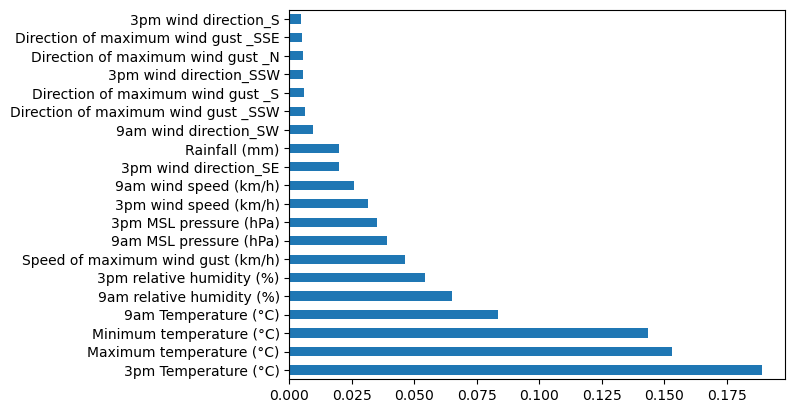

In [358]:
# Checking which feature is important to the target:
important_feature = RandomForestRegressor()
important_feature.fit(X,y)
print(important_feature.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(important_feature.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#the last time I ran this, Max temperature was the highest? What's happening?

In [359]:
#Trying to process categorical wind data to compare to Demand -HK
#"Numerical / Categorical: Convert Numerical to Categorical (binning), then use NMI for Cat/Cat"

# Current distribution of the movie_rating feature (numerical)
daily_weather_energy_consumption_df['Demand'].describe()

count       174.000000
mean     212150.913448
std       20902.476134
min      159249.920000
25%      198263.087500
50%      210512.690000
75%      225354.227500
max      292888.140000
Name: Demand, dtype: float64

In [360]:
#no idea if this binning is any good

def bin_rating(x):

    LOWER = 210000
    UPPER = 230000
    
    # [min, 5)
    if x < LOWER:
        return 0
    # [5, 10)
    elif LOWER <= x < UPPER:
        return 1 
    # [10, max] 
    return 2

# apply the function on the series
daily_weather_energy_consumption_df['bin_rating'] = daily_weather_energy_consumption_df['Demand'].apply(bin_rating)

# also, print out the min/max for this feature
data

[array([[-5.39006451e-01],
        [-1.47689155e+00],
        [-8.81695237e-01],
        [-5.02933947e-01],
        [ 3.08628018e+00],
        [-5.20970199e-01],
        [-7.19368970e-01],
        [-3.04535176e-01],
        [ 1.60730752e+00],
        [ 5.07096159e-01],
        [-7.37405222e-01],
        [ 1.19247373e+00],
        [-1.02598525e+00],
        [-3.22571428e-01],
        [-6.47223962e-01],
        [ 1.53516252e+00],
        [-4.84897695e-01],
        [-7.37405222e-01],
        [-4.48825191e-01],
        [ 6.51386174e-01],
        [ 4.52987403e-01],
        [-8.27586481e-01],
        [ 2.08110599e-03],
        [-1.24172657e-01],
        [ 1.37283625e+00],
        [-3.76680184e-01],
        [-4.12752688e-01],
        [-3.94716436e-01],
        [-5.75078955e-01],
        [-8.81695237e-01],
        [-6.47223962e-01],
        [-1.81958034e+00],
        [ 9.21929952e-01],
        [ 1.71552504e+00],
        [-8.45622733e-01],
        [-1.22438402e+00],
        [-4.84897695e-01],
 

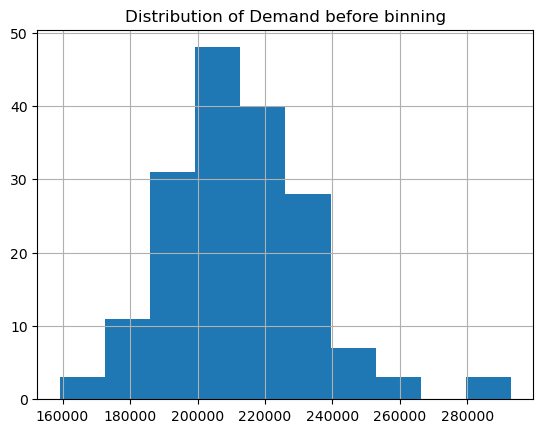

In [361]:
daily_weather_energy_consumption_df['Demand'].hist()

plt.title('Distribution of Demand before binning')

plt.show()

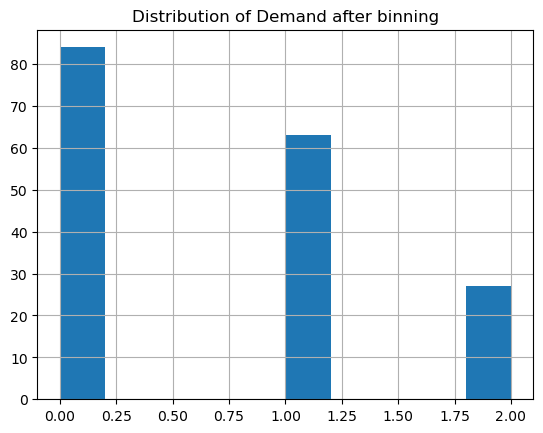

In [362]:
daily_weather_energy_consumption_df['bin_rating'].hist()

plt.title('Distribution of Demand after binning')

plt.show()

In [363]:
from sklearn.metrics import normalized_mutual_info_score
#tried to use direction of max wind gust, got key error....
#doesn't work after code that splits out wind into different columns above

normalized_mutual_info_score(daily_weather_energy_consumption_df['9am wind direction'], 
                             daily_weather_energy_consumption_df['bin_rating'],
                             average_method='min')

KeyError: '9am wind direction'

In [364]:
#Heather attempting some correlation analysis:
#based on the previous chart, choosing max temp and 9am humidity for plotting
#will not use multiple temperature measures together as they would not be independent from each other

# Calculate the Pearson's R correlation metric for Max temp, shows a moderate positive correlation
daily_weather_energy_consumption_df[['Maximum temperature (°C)', 'Demand']].corr(method='pearson')


,Maximum temperature (°C),Demand
Maximum temperature (°C),1.00000,0.36948
Demand,0.36948,1.00000


In [365]:
# Calculate the Pearson's R correlation metric for 9am humidity, shows trivial correlation
daily_weather_energy_consumption_df[['Demand', '9am relative humidity (%)']].corr(method='pearson')


,Demand,9am relative humidity (%)
Demand,1.000000,-0.047605
9am relative humidity (%),-0.047605,1.000000


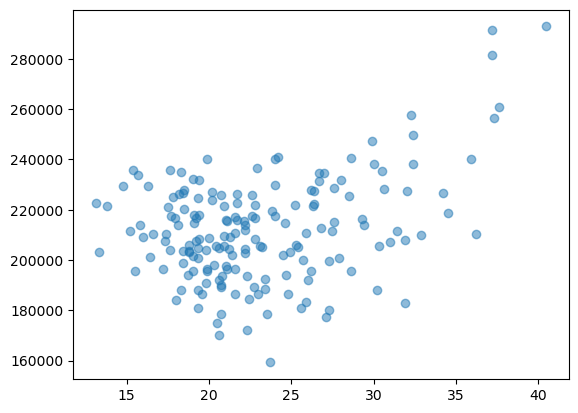

In [366]:
plt.scatter(x=daily_weather_energy_consumption_df['Maximum temperature (°C)'], y=daily_weather_energy_consumption_df['Demand'], alpha=0.5)

plt.show()


In [367]:
#from worksheets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import impute
from sklearn import preprocessing

#what is the syntax of X here...
X = daily_weather_energy_consumption_df[['Maximum temperature (°C)']]
y = daily_weather_energy_consumption_df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=59)


In [368]:
# Preprocessing

# Scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#what is the purpose of this in addition to the above?
# Create a MinMaxScaler object
#scaler_mm = MinMaxScaler()
#X_train_mm = scaler_mm.fit_transform(X_train)
#X_test_mm = scaler_mm.transform(X_test)

# Imputing not needed, done earlier?
#imputer = impute.SimpleImputer().fit(X_train)
#X_train=imputer.transform(X_train)
#X_test=imputer.transform(X_test)

In [369]:
# Instantiate
lm = linear_model.LinearRegression()
# Fit
lm.fit(X_train, y_train)
# Predict
y_pred = lm.predict(X_test)

In [370]:
print('actual MEDV values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MEDV values of the first 5 test data:')
print(y_pred[0:5])
print('')

actual MEDV values of the first 5 test data:
161    217930.82
129    217350.22
169    220897.61
159    195601.16
168    208495.00
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[204719.70273231 212822.58087997 202073.86496981 198766.56776668
 210838.20255809]



In [371]:
# Evaluate
#why is the r2 negative here? 

print("R2 score:", r2_score(y_test, y_pred))
print("RMSE score:", mean_squared_error(y_test, y_pred, squared=False))

R2 score: -0.14183803060990985
RMSE score: 18321.515936519005


In [ ]:
#how to build model?
lm.predict()

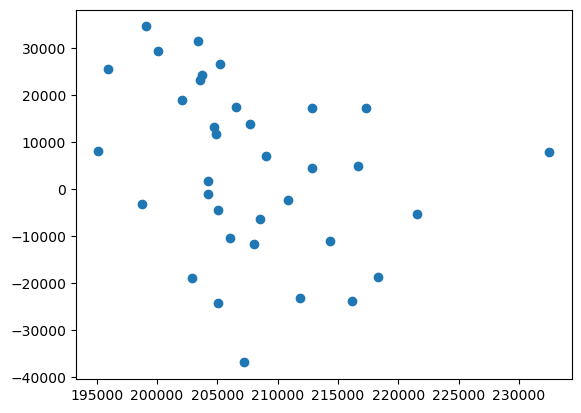

In [372]:
#trying to make a residual plot
#examine for: linearity, independence, equal variance
residuals= y_test - y_pred
plt.scatter(y_pred, residuals)

plt.show()

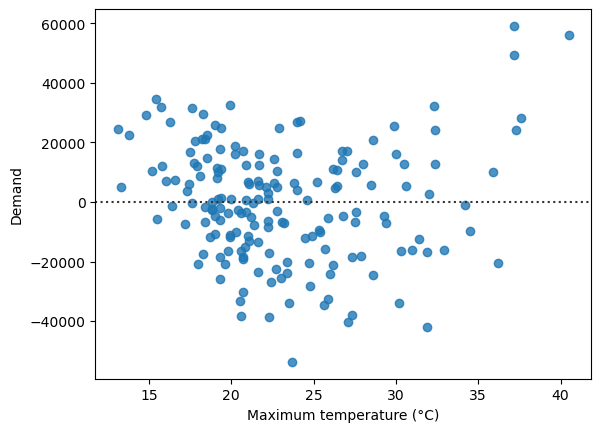

In [374]:
#another method from searching, for displaying residual plot, still working on this

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
 
sns.residplot(x=X, y=y)
  
plt.show()

In [ ]:
##look at this further.... (Halley's work)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create a MinMaxScaler object
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

In [ ]:
# Checking the number of feature:
number_input_feature = X_train.shape[1]
number_input_feature

In [ ]:

# Create a function to test the model:
def test_model(model, data):
    X_train, X_test, y_train, y_test = data
    reg = model.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Training data')
    plt.title('Training data')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.legend(loc='upper left')
    plt.plot([0, 50], [0, 50], c='red')
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, c='green', marker='x', label='Test data')
    plt.title('Test data')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.legend(loc='upper left')
    plt.plot([0, 50], [0, 50], c='red')

    print(f'Model: {type(reg).__name__}')
    print(f'Train MSE: {mean_squared_error(y_train, y_train_pred):.2f}')
    print(f'Train MAE: {mean_absolute_error(y_train, y_train_pred):.2f}')
    print(f'Train R2: {r2_score(y_train, y_train_pred):.2f}\n')

    print(f'Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}')
    print(f'Test MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
    print(f'Test R2: {r2_score(y_test, y_test_pred):.2f}\n')

    print(f'Train score: {reg.score(X_train, y_train)}')
    print(f'Test Score: {reg.score(X_test, y_test)}\n')
    print(f'***************************************\n')
    

In [ ]:
# Testing different models
#should only use models we've learned about if doing this? Are these all types of regression? -HK

data = [X_train_scaled, X_test_scaled, y_train, y_test]

test_model(LinearRegression(), data)
#test_model(KNeighborsRegressor(), data)
#test_model(RandomForestRegressor(), data)
#test_model(GradientBoostingRegressor(), data)
#test_model(AdaBoostRegressor(), data)
#test_model(SVR(C=1.0, epsilon=0.2), data)
#test_model(ExtraTreesRegressor(), data)

In [ ]:
# Testing model with MinMaxScaler
data_mm = [X_train_mm, X_test_mm, y_train, y_test]

test_model(LinearRegression(), data_mm)
#test_model(KNeighborsRegressor(), data_mm)
#test_model(RandomForestRegressor(), data_mm)
#test_model(GradientBoostingRegressor(), data_mm)
#test_model(AdaBoostRegressor(), data_mm)
#test_model(SVR(C=1.0, epsilon=0.2), data_mm)
#test_model(ExtraTreesRegressor(), data_mm)

#### Model Selection
The selection model is


#### Model Deploy

In [ ]:
# Saving the model:
model.save("Max_daily_energy_usage.h5")